In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import mpld3
import umap
import sklearn
from sklearn.manifold import TSNE

%matplotlib inline 
mpld3.enable_notebook()

def load_data(directory):
    data = []
    for file in os.listdir(directory):
        data.append(np.load(directory+"/"+file))
    data = np.array(data)
    return data

kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')

data = load_data("full_points_final")
tt = data.reshape(2196, 784)


def plot_lc(emedded_mat, title):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    N = len(x)
#     c = np.random.random(size=N)
#     print c
    hehe = []
    s = []
    for i in range(N):
        if i in weird_points:
            hehe.append(2)
            s.append(30)
        else:
            hehe.append(0)
            s.append(1)
        
    hehe = np.array(hehe)
    s = np.array(s)
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         s=s,
                         alpha=0.3)
    ax.grid(color='white', linestyle='solid')

    ax.set_title(title, size=15)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)


In [2]:
artificial_data = np.ones((90, 20))

In [3]:
artificial_data.shape

(10, 20)

In [14]:
artificial_data = np.vstack((np.ones((90, 20)), np.random.rand(10, 20)))

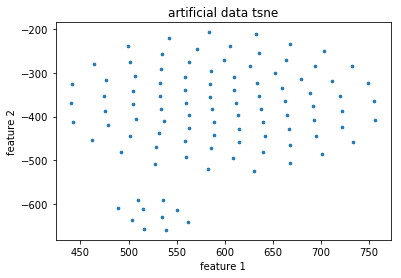

In [16]:
x_embedded_tsne = TSNE(n_components=2, perplexity=40, learning_rate=600, early_exaggeration=1000).fit_transform(artificial_data)
plt.title("artificial data tsne")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(x_embedded_tsne[:, 0], x_embedded_tsne[:, 1], s=7)



/anaconda/lib/python2.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


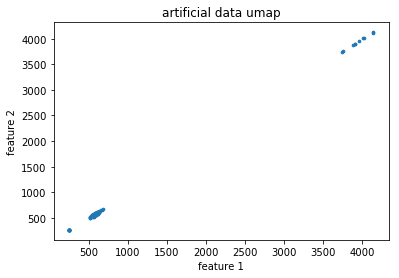

In [17]:
x_embedded_umap = umap.UMAP(n_neighbors=10, min_dist=1.0).fit_transform(artificial_data)
plt.title("artificial data umap")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(x_embedded_umap[:, 0], x_embedded_umap[:, 1], s=7)

In [14]:
import numpy as np
temp = np.random.rand(10, 20)
cluster_2 = temp/np.sum(temp)

In [15]:
cluster_1 = np.ones((90, 20))/20

In [16]:
artificial_data = np.vstack((cluster_1, cluster_2))

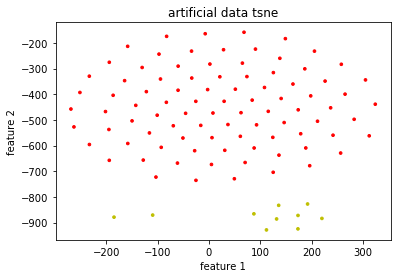

In [28]:
x_embedded_tsne = TSNE(n_components=2, perplexity=40, learning_rate=600, early_exaggeration=1000).fit_transform(artificial_data)
plt.title("artificial data tsne")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
colors = ['r' for i in range(90)] + ['y' for i in range(10)]

plt.scatter(x_embedded_tsne[:, 0], x_embedded_tsne[:, 1], s=7, c = colors)

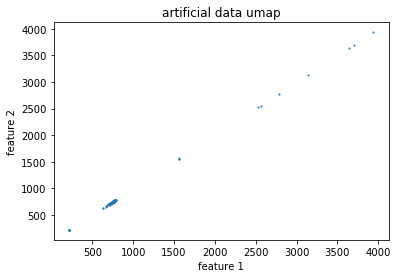

In [22]:
x_embedded_umap = umap.UMAP(n_neighbors=10, min_dist=1.0).fit_transform(artificial_data)
plt.title("artificial data umap")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
colors = ['r' for i in range(90)] + ['y' for i in range(10)]

plt.scatter(x_embedded_umap[:, 0], x_embedded_umap[:, 1], s=1, c =colors)